In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

DaymetPath = '/Users/lejoflores/data/daymet/'

prcpName = 'prcp_1980-2018.nc'


In [4]:
prcp_file = DaymetPath + prcpName
print(prcp_file)

/Users/lejoflores/data/daymet/prcp_1980-2018.nc


In [5]:
ds = xr.open_dataset(prcp_file)


In [6]:
print(ds)

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 14235, x: 195, y: 238)
Coordinates:
  * x                        (x) float64 -1.411e+06 -1.41e+06 -1.409e+06 ...
  * y                        (y) float64 3.06e+05 3.05e+05 3.04e+05 3.03e+05 ...
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00 ...
    lat                      (y, x) float64 ...
    lon                      (y, x) float64 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  int16 ...
    yearday                  (time) int16 ...
    prcp                     (time, y, x) float64 ...
    time_bnds                (time, nv) float64 ...
Attributes:
    tileid:            11912
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    

In [9]:
lat = ds['lat']
lon = ds['lon']

print(lat.shape)
print(lon.shape)


(238, 195)
(238, 195)


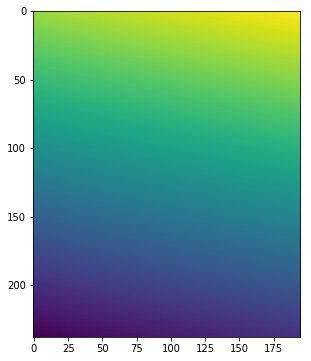

In [11]:
plt.figure(figsize=(8,6)) 
plt.imshow(lat)
plt.show()

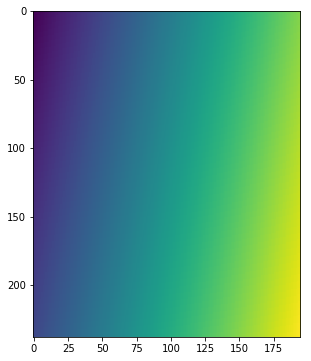

In [12]:
plt.figure(figsize=(8,6))
plt.imshow(lon)
plt.show()


In [24]:
ds_ann = ds.groupby('time.year').mean('time')

In [35]:
ds_mean_ann = ds_ann.mean('year')
print(ds_mean_ann)

<xarray.Dataset>
Dimensions:                  (nv: 2, x: 195, y: 238)
Coordinates:
  * x                        (x) float64 -1.411e+06 -1.41e+06 -1.409e+06 ...
  * y                        (y) float64 3.06e+05 3.05e+05 3.04e+05 3.03e+05 ...
    lat                      (y, x) float64 43.9 43.9 43.9 43.91 43.91 43.91 ...
    lon                      (y, x) float64 -118.6 -118.6 -118.6 -118.5 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  float64 -3.277e+04
    yearday                  float64 182.0
    prcp                     (y, x) float64 nan nan nan nan nan nan nan nan ...
    time_bnds                (nv) float64 7.122e+03 7.123e+03


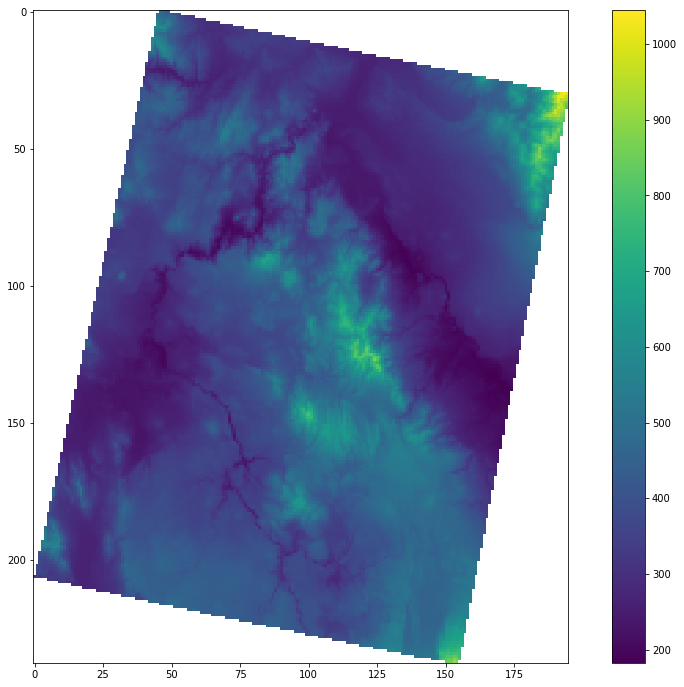

In [36]:
MeanAnnPrcp = ds_mean_ann['prcp'].values

plt.figure(figsize=(16,12))
plt.imshow(MeanAnnPrcp*365.0)
plt.colorbar()
plt.show()

In [37]:
ds_max_ann = ds_ann.max('year')
ds_min_ann = ds_ann.min('year')

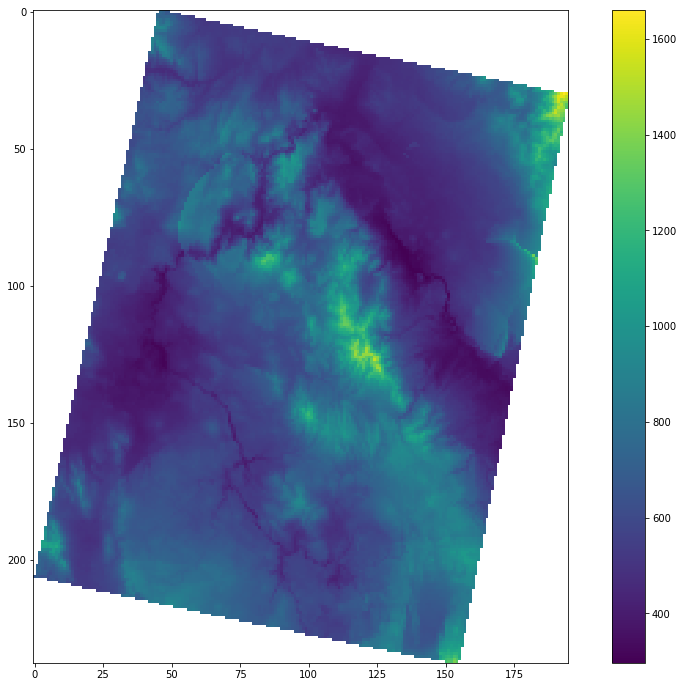

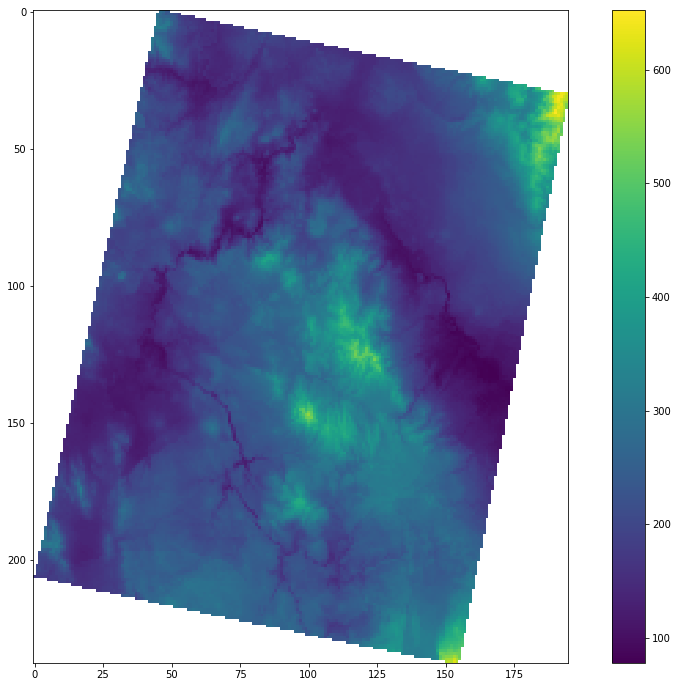

In [38]:
MaxAnnPrcp = ds_max_ann['prcp'].values
MinAnnPrcp = ds_min_ann['prcp'].values

plt.figure(figsize=(16,12))
plt.imshow(MaxAnnPrcp*365.0)
plt.colorbar()
plt.show()

plt.figure(figsize=(16,12))
plt.imshow(MinAnnPrcp*365.0)
plt.colorbar()
plt.show()




In [40]:
ds_cv_ann = ds_ann.std('year')/ds_ann.mean('year')
print(ds_cv_ann)

<xarray.Dataset>
Dimensions:                  (nv: 2, x: 195, y: 238)
Coordinates:
  * x                        (x) float64 -1.411e+06 -1.41e+06 -1.409e+06 ...
  * y                        (y) float64 3.06e+05 3.05e+05 3.04e+05 3.03e+05 ...
    lat                      (y, x) float64 43.9 43.9 43.9 43.91 43.91 43.91 ...
    lon                      (y, x) float64 -118.6 -118.6 -118.6 -118.5 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  float64 -0.0
    yearday                  float64 0.0
    prcp                     (y, x) float64 nan nan nan nan nan nan nan nan ...
    time_bnds                (nv) float64 0.5772 0.5771


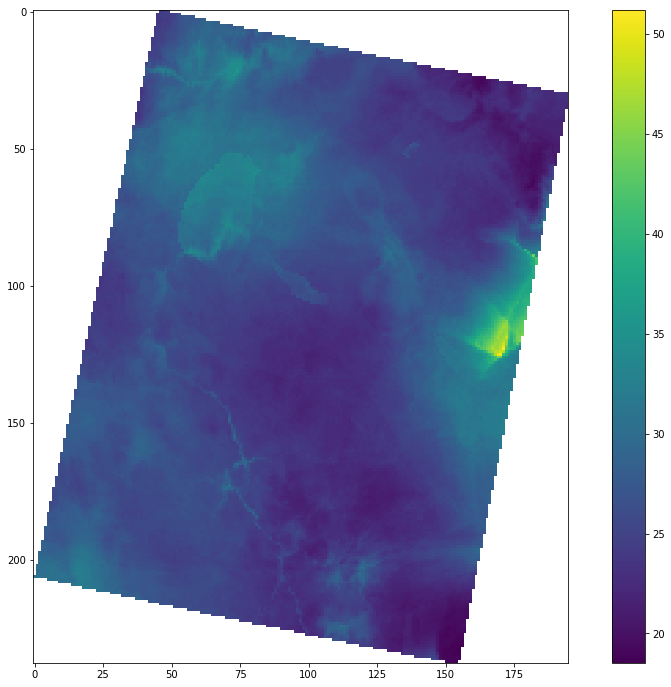

In [41]:
CVAnnPrcp = ds_cv_ann['prcp'].values

plt.figure(figsize=(16,12))
plt.imshow(CVAnnPrcp*100.0)
plt.colorbar()
plt.show()